# Multi Layer Perceptron (MLP)


## 입력층, 출력층만 있는 NLP를 배열의 곱으로 구현:

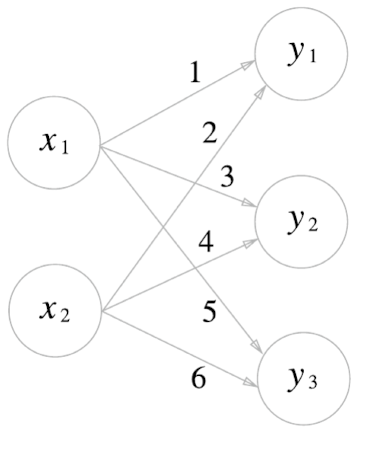


In [ ]:
import numpy as np

X = np.array([1, 2])  # [x_1, x_2]
W = np.array([[1, 3, 5], [2, 4, 6]])  # [[w_11, w_12, w_13], [w_21, w_22, w_23]]
Y = np.dot(X, W)  # or X @ W
print(Y)  # [y_1, y_2, y_3]

[ 5 11 17]


## 은닉층이 2개인 MLP를 배열로 구현

| 1                                  | 2                                      | 3                                      | 4                                      |
| ---------------------------------- | -------------------------------------- | -------------------------------------- | -------------------------------------- |
| 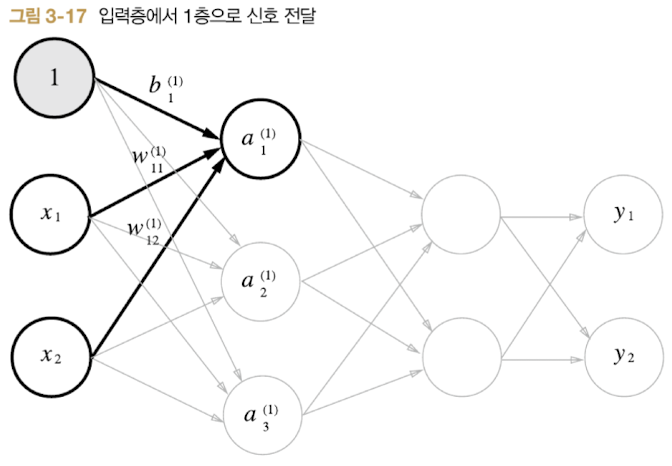 | 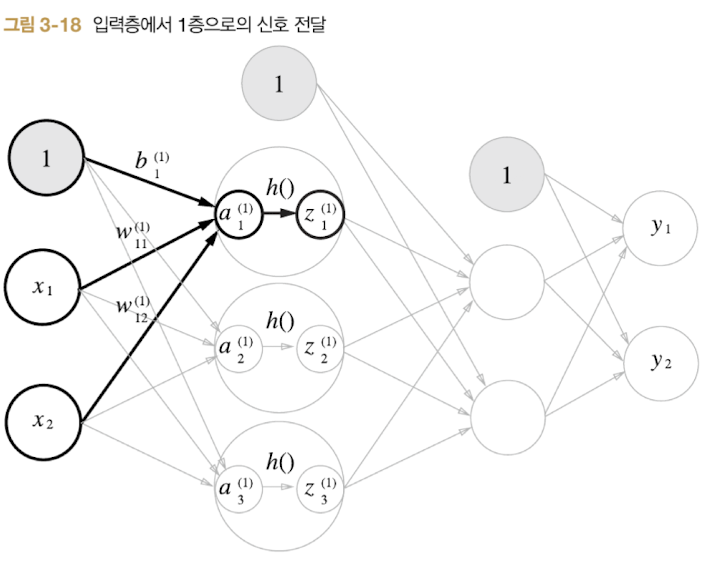 | 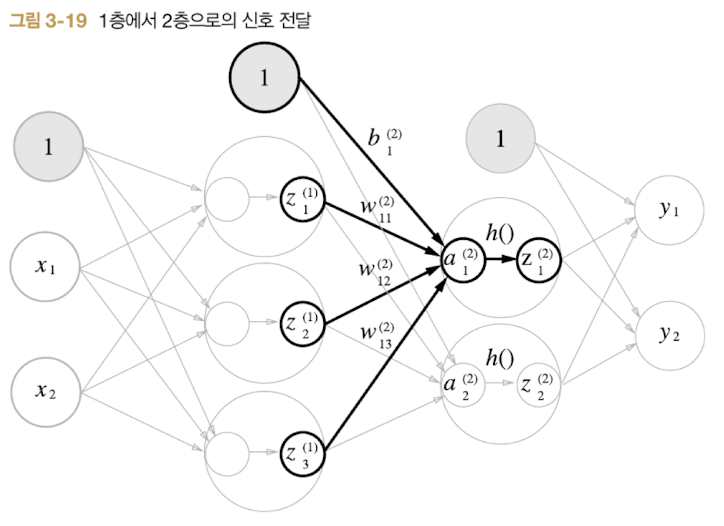 | 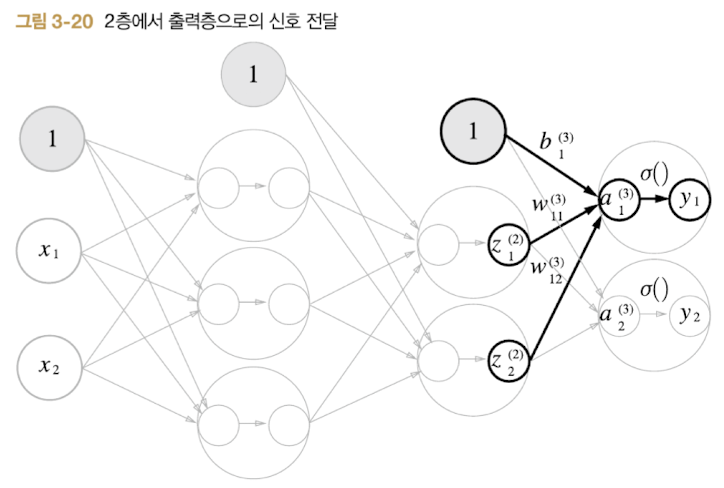 |


In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def init_network():
    network = {}
    network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network["b1"] = np.array([0.1, 0.2, 0.3])
    network["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network["b2"] = np.array([0.1, 0.2])
    network["W3"] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network["b3"] = np.array([0.1, 0.2])
    return network


def forward(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    y = np.dot(z2, W3) + b3
    return y


network = init_network()
x = np.array([1.0, 0.5])  # input [x_1, x_2]
y = forward(network, x)  # output [y_1, y_2]
print(y)

[0.31682708 0.69627909]


In [5]:
# class 방식의 구현
import numpy as np


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


class MLP:
    def __init__(self):
        self.W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
        self.b1 = np.array([0.1, 0.2, 0.3])
        self.W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
        self.b2 = np.array([0.1, 0.2])
        self.W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
        self.b3 = np.array([0.1, 0.2])

    def forward(self, x):
        a1 = np.dot(x, self.W1) + self.b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, self.W2) + self.b2
        z2 = sigmoid(a2)
        y = np.dot(z2, self.W3) + self.b3
        return y


network = MLP()
x = np.array([1.0, 0.5])
y = network.forward(x)
print(y)

[0.31682708 0.69627909]


## softmax 함수


In [8]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

In [9]:
# overflow 예시
a = np.array([1010, 1000, 990])
print(softmax(a))

[nan nan nan]


/var/folders/l8/j6qyg9hs5jsc5q2hcq_848r00000gn/T/ipykernel_62944/1528662570.py:2: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
/var/folders/l8/j6qyg9hs5jsc5q2hcq_848r00000gn/T/ipykernel_62944/1528662570.py:4: RuntimeWarning: invalid value encountered in divide
  return exp_a / sum_exp_a


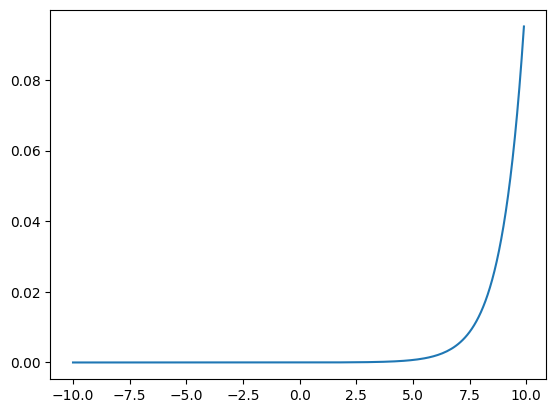

In [12]:
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.1)
y = softmax(x)
plt.plot(x, y)
plt.show()

In [ ]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  # overflow 대책
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a


a = np.array([1010, 1000, 990])
print(softmax(a))
print(np.sum(softmax(a)))  # 출력의 합이 1 -> 확률로 해석 가능

[9.99954600e-01 4.53978686e-05 2.06106005e-09]
1.0


In [ ]:
# 출력층에 softmax 적용

import numpy as np


class MLP:
    def __init__(self):
        self.W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
        self.b1 = np.array([0.1, 0.2, 0.3])
        self.W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
        self.b2 = np.array([0.1, 0.2])
        self.W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
        self.b3 = np.array([0.1, 0.2])

    def forward(self, x):
        a1 = np.dot(x, self.W1) + self.b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, self.W2) + self.b2
        z2 = sigmoid(a2)
        a3 = np.dot(z2, self.W3) + self.b3
        y = softmax(a3)
        return y


network = MLP()
x = np.array([1.0, 0.5])
y = network.forward(x)
print(y)
print(np.sum(y))  # 출력의 합이 1 -> 확률로 해석 가능

[0.40625907 0.59374093]
1.0
